# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres (или используйте `*.csv` как есть).
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

### 1. Импорт данных и библиотек

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score


In [ ]:
clients_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_clients.csv'
close_loan_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_close_loan.csv'
job_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_job.csv'
last_credit_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_last_credit.csv'
loan_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_loan.csv'
pens_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_pens.csv'
salary_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_salary.csv'
work_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_work.csv'
target_link = 'https://raw.githubusercontent.com/aiedu-courses/linear_models/main/datasets/clients/D_target.csv'

In [ ]:
clients = pd.read_csv(clients_link)
close_loan = pd.read_csv(close_loan_link)
job = pd.read_csv(job_link)
last_credit = pd.read_csv(last_credit_link)
loan = pd.read_csv(loan_link)
pens = pd.read_csv(pens_link)
salary = pd.read_csv(salary_link)
work = pd.read_csv(work_link)
target = pd.read_csv(target_link)

In [ ]:
clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


In [ ]:
clients.shape

(16000, 14)

In [ ]:
job.head()

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
0,Торговля,Рабочий,Вспомогательный техперсонал,18.0,106804370
1,Торговля,Рабочий,Участие в основ. деятельности,97.0,106804371
2,Информационные технологии,Специалист,Участие в основ. деятельности,84.0,106804372
3,Образование,Руководитель среднего звена,Участие в основ. деятельности,168.0,106804373
4,Государственная служба,Специалист,Участие в основ. деятельности,101.0,106804374


In [ ]:
job.shape

(15223, 5)

In [ ]:
df = clients.merge(job, left_on='ID', right_on='ID_CLIENT', how='left').drop('ID_CLIENT', axis=1)

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,Торговля,Специалист,Участие в основ. деятельности,5.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,Государственная служба,Специалист,Участие в основ. деятельности,3.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,Другие сферы,Специалист,Участие в основ. деятельности,12.0


In [ ]:
last_credit.head()

,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
0,8000.00,6,8650.0,106804370
1,21650.00,6,4000.0,106804371
2,33126.00,12,4000.0,106804372
3,8491.82,6,5000.0,106804373
4,21990.00,12,4000.0,106804374


In [ ]:
last_credit.shape

(15223, 4)

In [ ]:
df = df.merge(last_credit, left_on='ID', right_on='ID_CLIENT', how='left').drop('ID_CLIENT', axis=1)

In [ ]:
loan.head()

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


In [ ]:
loan.shape

(21126, 2)

In [ ]:
pens.head()

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


In [ ]:
salary.head()

,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
0,от 20000 до 50000 руб.,20000.0,106809321
1,от 20000 до 50000 руб.,14000.0,106815561
2,от 10000 до 20000 руб.,15000.0,106811521
3,от 20000 до 50000 руб.,20000.0,106811252
4,от 20000 до 50000 руб.,25000.0,106808620


In [ ]:
salary.shape

(15523, 3)

In [ ]:
df = df.merge(salary, left_on='ID', right_on='ID_CLIENT', how='left').drop('ID_CLIENT', axis=1)

In [ ]:
work.head()

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [ ]:
target.head()

,AGREEMENT_RK,ID_CLIENT,TARGET
0,59910150,106804370,0
1,59910230,106804371,0
2,59910525,106804372,0
3,59910803,106804373,0
4,59911781,106804374,0


In [ ]:
target.shape

(15223, 3)

In [ ]:
df = df.merge(target, left_on='ID', right_on='ID_CLIENT', how='left').drop('ID_CLIENT', axis=1)

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,GEN_TITLE,JOB_DIR,WORK_TIME,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,Работник сферы услуг,Участие в основ. деятельности,3.0,5588.0,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,Специалист,Участие в основ. деятельности,5.0,19498.0,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,Руководитель высшего звена,Участие в основ. деятельности,360.0,15470.0,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,Специалист,Участие в основ. деятельности,3.0,13960.0,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,Специалист,Участие в основ. деятельности,12.0,11890.0,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0


In [ ]:
loan.head()

,ID_LOAN,ID_CLIENT
0,1753790658,106804370
1,1753790659,106804371
2,1753790660,106804372
3,1753790661,106804372
4,1753790662,106804373


In [ ]:
df = df.merge(loan, left_on='ID', right_on='ID_CLIENT', how='left')

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,WORK_TIME,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,ID_LOAN,ID_CLIENT
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,3.0,5588.0,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0,1.753791e+09,106805103.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,5.0,19498.0,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0,1.753796e+09,106809308.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,360.0,15470.0,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0,1.753792e+09,106805867.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,3.0,13960.0,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0,1.753796e+09,106808779.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,12.0,11890.0,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0,1.753802e+09,106814289.0


In [ ]:
df = df.drop('ID_CLIENT', axis=1)

In [ ]:
close_loan.head()

,ID_LOAN,CLOSED_FL
0,1753790658,1
1,1753790659,1
2,1753790660,1
3,1753790661,0
4,1753790662,1


In [ ]:
df = df.merge(close_loan, left_on='ID_LOAN', right_on='ID_LOAN', how='left')

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,WORK_TIME,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,ID_LOAN,CLOSED_FL
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,3.0,5588.0,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0,1.753791e+09,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,5.0,19498.0,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0,1.753796e+09,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,360.0,15470.0,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0,1.753792e+09,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,3.0,13960.0,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0,1.753796e+09,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,12.0,11890.0,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0,1.753802e+09,1.0


In [ ]:
df = df.drop_duplicates(subset=['ID_LOAN'])

In [ ]:
df.shape

(21127, 27)

In [ ]:
df_loans = df.groupby('ID').agg(
    TOTAL_LOANS=('ID_LOAN', 'count'),
    CLOSED_LOANS=('CLOSED_FL', 'sum')
).reset_index()

df_loans.head()

,ID,TOTAL_LOANS,CLOSED_LOANS
0,106804370,1,1.0
1,106804371,1,1.0
2,106804372,2,1.0
3,106804373,1,1.0
4,106804374,2,1.0


In [ ]:
df = df.merge(df_loans, left_on='ID', right_on='ID', how='left')

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,ID_LOAN,CLOSED_FL,TOTAL_LOANS,CLOSED_LOANS
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0,1.753791e+09,0.0,1,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0,1.753796e+09,0.0,1,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0,1.753792e+09,1.0,1,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0,1.753796e+09,0.0,1,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0,1.753802e+09,1.0,2,2.0


In [ ]:
df = df.drop(['ID_LOAN', 'CLOSED_FL'], axis=1)

In [ ]:
df = df.drop_duplicates(subset=['ID'])

In [ ]:
df.shape

(15224, 27)

In [ ]:
df.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,WORK_TIME,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,TOTAL_LOANS,CLOSED_LOANS
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,3.0,5588.0,6.0,1000.0,от 20000 до 50000 руб.,25000.0,60099204.0,1.0,1,0.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,5.0,19498.0,12.0,0.0,от 10000 до 20000 руб.,10000.0,62244665.0,0.0,1,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,360.0,15470.0,3.0,15000.0,от 20000 до 50000 руб.,30000.0,61050759.0,0.0,1,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,3.0,13960.0,6.0,2500.0,от 20000 до 50000 руб.,25000.0,62079659.0,0.0,1,0.0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,12.0,11890.0,6.0,8000.0,от 10000 до 20000 руб.,15000.0,66583553.0,0.0,2,2.0


In [ ]:
df.isna().sum()

,0
ID,0
AGE,0
GENDER,0
EDUCATION,0
MARITAL_STATUS,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
REG_ADDRESS_PROVINCE,0


In [ ]:
df = df.dropna(subset=['TARGET'])
df.isna().sum()

,0
ID,0
AGE,0
GENDER,0
EDUCATION,0
MARITAL_STATUS,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
REG_ADDRESS_PROVINCE,0


In [ ]:
df['WORK_TIME'] = df['WORK_TIME'].fillna(0)
df[['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR']] = df[['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR']].fillna('no_data')
df.isna().sum()

,0
ID,0
AGE,0
GENDER,0
EDUCATION,0
MARITAL_STATUS,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
REG_ADDRESS_PROVINCE,0


In [ ]:
df['ID'].nunique()

15223

In [ ]:
df['AGREEMENT_RK'].nunique()

15223

In [ ]:
df = df.drop('ID', axis=1)

### 2. EDA

In [ ]:
df.describe()

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,WORK_TIME,CREDIT,TERM,FST_PAYMENT,PERSONAL_INCOME,AGREEMENT_RK,TARGET,TOTAL_LOANS,CLOSED_LOANS
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,15223.000000,15223.000000,15223.000000
mean,40.406096,0.654536,1.099389,0.645208,0.909610,0.134468,0.309794,0.116337,2.659526e+02,14667.959345,8.101031,3398.562655,13853.836323,6.540183e+07,0.119030,1.387769,0.751889
std,11.601068,0.475535,0.995411,0.812252,0.286748,0.341165,0.462424,0.320844,2.324438e+04,12147.873496,4.094090,5158.108934,9015.467617,4.568181e+06,0.323835,0.793566,0.988499
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2000.000000,3.000000,0.000000,24.000000,5.991015e+07,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.400000e+01,6500.000000,6.000000,1000.000000,8000.000000,6.192092e+07,0.000000,1.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000e+01,11550.000000,6.000000,2000.000000,12000.000000,6.437100e+07,0.000000,1.000000,0.000000
75%,50.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,9.600000e+01,19170.000000,10.000000,4000.000000,17000.000000,6.708802e+07,0.000000,2.000000,1.000000
max,67.000000,1.000000,10.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.867959e+06,119700.000000,36.000000,140000.000000,250000.000000,7.529224e+07,1.000000,11.000000,11.000000


In [ ]:
df['WORK_TIME'].value_counts()

,count
WORK_TIME,
0.0,1368
36.0,1263
24.0,1140
60.0,989
12.0,861
...,...
176.0,1
209.0,1
576.0,1


In [ ]:
df['WORK_YEARS'] = df['WORK_TIME'] // 12

In [ ]:
df[df['WORK_YEARS'] > 50]

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,...,CREDIT,TERM,FST_PAYMENT,FAMILY_INCOME,PERSONAL_INCOME,AGREEMENT_RK,TARGET,TOTAL_LOANS,CLOSED_LOANS,WORK_YEARS
2619,59,1,Высшее,Вдовец/Вдова,0,0,1,0,Тюменская область,Тюменская область,...,7770.0,3.0,11000.0,от 10000 до 20000 руб.,14000.0,67171084.0,0.0,1,1.0,104.0
5041,25,1,Среднее специальное,Не состоял в браке,0,0,1,0,Коми,Коми,...,19622.0,6.0,5000.0,от 20000 до 50000 руб.,9000.0,65406938.0,0.0,1,1.0,238996.0
5551,30,1,Высшее,Состою в браке,0,0,1,0,Коми,Коми,...,2360.0,3.0,2500.0,от 20000 до 50000 руб.,23000.0,66709308.0,0.0,2,2.0,71.0
6426,28,1,Высшее,Состою в браке,1,1,1,0,Краснодарский край,Краснодарский край,...,7890.0,6.0,5000.0,от 20000 до 50000 руб.,15000.0,66846712.0,1.0,1,1.0,72.0
6670,62,1,Среднее,Состою в браке,1,0,1,1,Иркутская область,Иркутская область,...,29500.0,6.0,9500.0,от 10000 до 20000 руб.,13300.0,64426430.0,0.0,1,0.0,60.0
8572,39,0,Среднее,Состою в браке,2,2,1,0,Ростовская область,Ростовская область,...,7990.0,4.0,888.0,от 20000 до 50000 руб.,25000.0,61471939.0,0.0,1,1.0,51.0
10391,45,0,Высшее,Состою в браке,2,2,1,0,Липецкая область,Липецкая область,...,23204.0,12.0,800.0,от 20000 до 50000 руб.,15000.0,60398458.0,0.0,1,0.0,109.0
10559,50,1,Среднее,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,...,4221.0,5.0,469.0,от 10000 до 20000 руб.,10000.0,62030443.0,0.0,1,0.0,833.0
11186,42,1,Высшее,Состою в браке,2,2,1,0,Калининградская область,Калининградская область,...,6998.0,6.0,2000.0,от 20000 до 50000 руб.,12000.0,66596667.0,0.0,2,2.0,81.0
11348,38,1,Среднее,Состою в браке,3,3,1,1,Тульская область,Тульская область,...,3050.0,3.0,200.0,от 10000 до 20000 руб.,8000.0,66530223.0,0.0,2,2.0,125.0


In [ ]:
median_work_by_age = df.groupby('AGE')['WORK_YEARS'].median()

def fix_work_years(row):
    if row['WORK_YEARS'] > 50 or row['WORK_YEARS'] >= row['AGE'] - 16:
        return median_work_by_age.get(row['AGE'], 0)  # Берём медиану по возрасту, если нет — 0
    return row['WORK_YEARS']

df['WORK_YEARS'] = df.apply(fix_work_years, axis=1)


In [ ]:
df['WORK_YEARS'].describe()

,WORK_YEARS
count,15223.000000
mean,6.116009
std,7.452017
min,0.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,44.000000


In [ ]:
df = df.drop('WORK_TIME', axis=1)

In [ ]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
Среднее специальное,6518
Среднее,4679
Высшее,3133
Неоконченное высшее,532
Неполное среднее,340
Два и более высших образования,20
Ученая степень,1


In [ ]:
df['MARITAL_STATUS'].value_counts()

,count
MARITAL_STATUS,
Состою в браке,9416
Не состоял в браке,3622
Разведен(а),1245
Вдовец/Вдова,588
Гражданский брак,352


In [ ]:
df.columns

Index(['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO', 'GEN_INDUSTRY',
       'GEN_TITLE', 'JOB_DIR', 'CREDIT', 'TERM', 'FST_PAYMENT',
       'FAMILY_INCOME', 'PERSONAL_INCOME', 'AGREEMENT_RK', 'TARGET',
       'TOTAL_LOANS', 'CLOSED_LOANS', 'WORK_YEARS'],
      dtype='object')

In [ ]:
categorical = ['GENDER', 'MARITAL_STATUS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'FL_PRESENCE_FL']
numerical = ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'CREDIT',
             'TERM', 'FST_PAYMENT', 'OWN_AUTO',
             'PERSONAL_INCOME', 'TOTAL_LOANS', 'CLOSED_LOANS', 'WORK_YEARS']

In [ ]:
df[categorical + numerical + ["TARGET"]].head()

,GENDER,MARITAL_STATUS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,AGE,CHILD_TOTAL,DEPENDANTS,CREDIT,TERM,FST_PAYMENT,OWN_AUTO,PERSONAL_INCOME,TOTAL_LOANS,CLOSED_LOANS,WORK_YEARS,TARGET
0,1,Не состоял в браке,1,0,1,42,1,0,5588.0,6.0,1000.0,0,25000.0,1,0.0,0.0,1.0
1,1,Состою в браке,1,0,0,28,1,1,19498.0,12.0,0.0,0,10000.0,1,0.0,0.0,0.0
2,0,Состою в браке,1,1,0,64,2,0,15470.0,3.0,15000.0,1,30000.0,1,1.0,30.0,0.0
3,1,Состою в браке,1,0,1,54,0,0,13960.0,6.0,2500.0,1,25000.0,1,0.0,0.0,0.0
4,0,Состою в браке,1,0,1,26,1,1,11890.0,6.0,8000.0,0,15000.0,2,2.0,1.0,0.0


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

colors = ['#E5C4B2', '#B0C252', '#57762C', '#B494B3', '#335E7D']
sns.set_palette(colors)

cmap_colors = ['#B0C252', '#E5C4B2']
cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

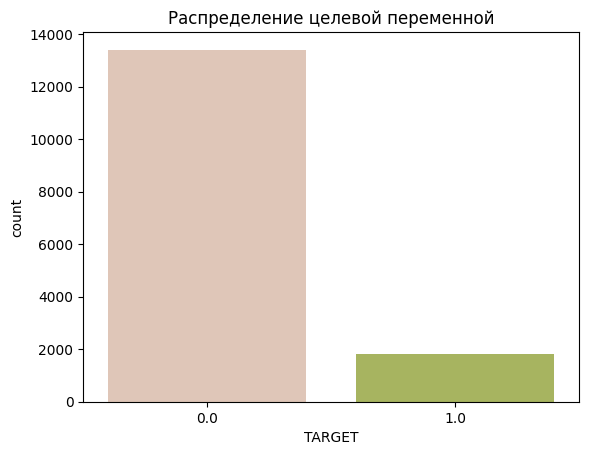

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='TARGET', data=df,  palette=colors)
plt.title('Распределение целевой переменной')
plt.show()


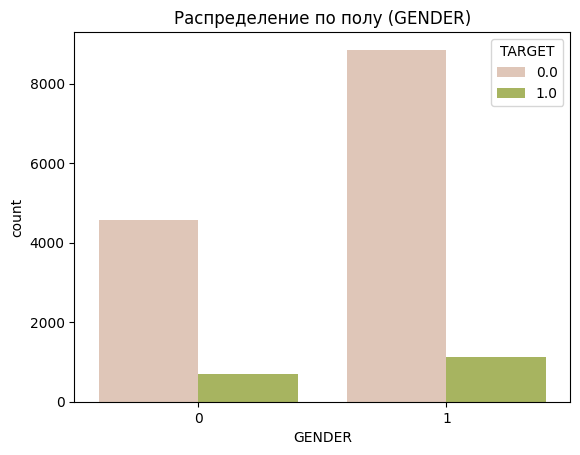

In [ ]:
sns.countplot(x='GENDER', hue='TARGET', data=df)
plt.title('Распределение по полу (GENDER)')
plt.show()


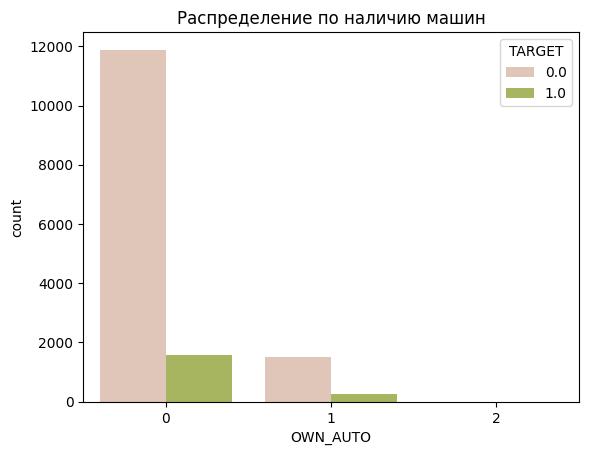

In [ ]:
sns.countplot(x='OWN_AUTO', hue='TARGET', data=df)
plt.title('Распределение по наличию машин')
plt.show()

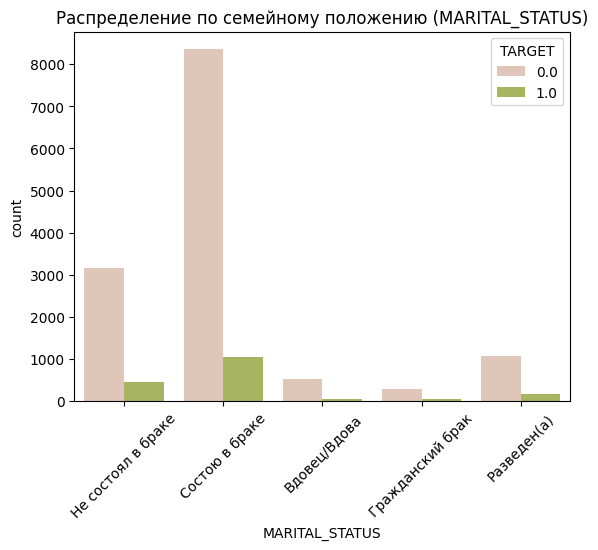

In [ ]:
sns.countplot(x='MARITAL_STATUS', hue='TARGET', data=df)
plt.title('Распределение по семейному положению (MARITAL_STATUS)')
plt.tick_params(axis='x', rotation=45)
plt.show()

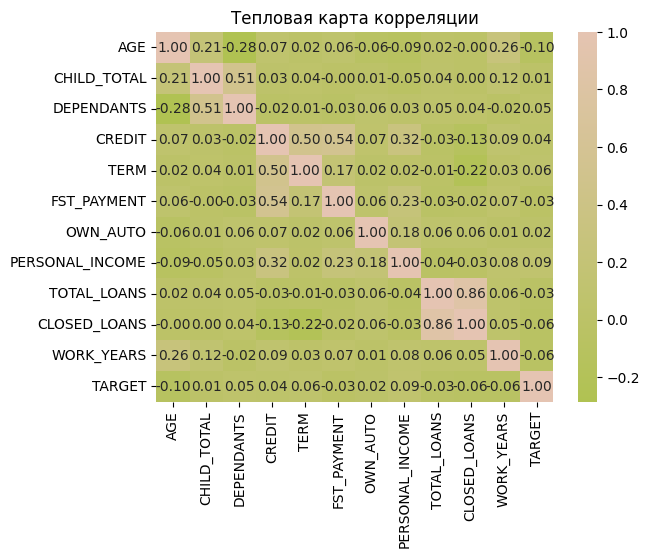

In [ ]:
corr = df[numerical + ['TARGET']].corr()
sns.heatmap(corr, annot=True, cmap=cmap, fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

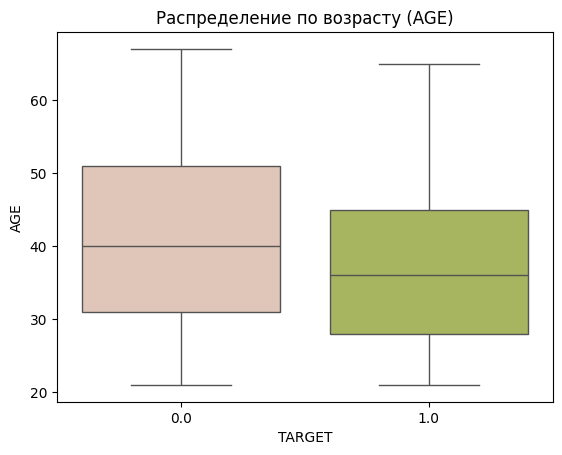

In [ ]:
sns.boxplot(x='TARGET', y='AGE', data=df, palette=colors)
plt.title('Распределение по возрасту (AGE)')
plt.show()

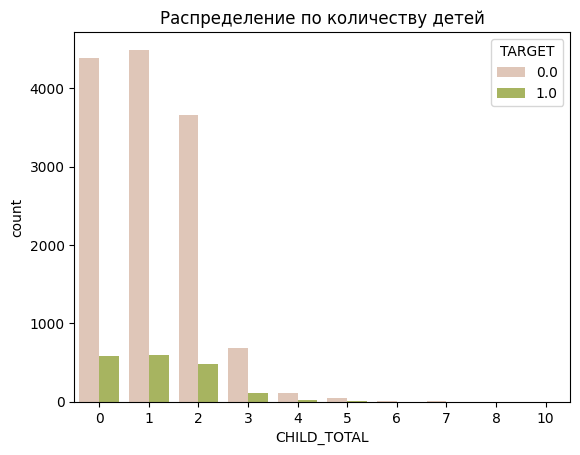

In [ ]:
sns.countplot(x='CHILD_TOTAL', hue='TARGET', data=df)
plt.title('Распределение по количеству детей')
plt.show()

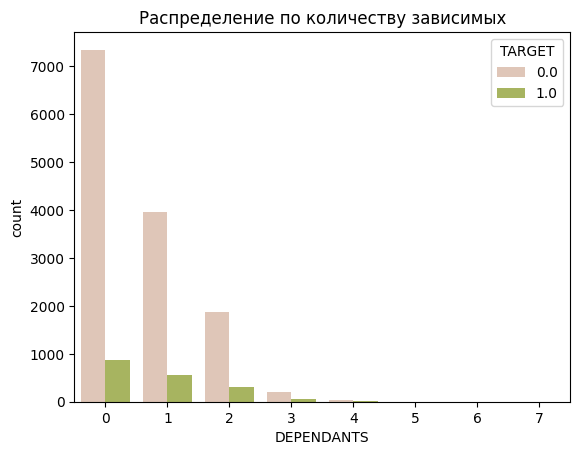

In [ ]:
sns.countplot(x='DEPENDANTS', hue='TARGET', data=df)
plt.title('Распределение по количеству зависимых')
plt.show()

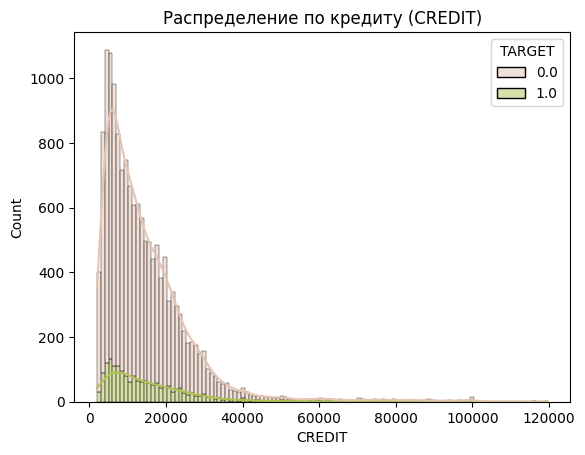

In [ ]:
sns.histplot(data=df, x='CREDIT', hue='TARGET', kde=True, palette=colors, multiple='stack')
plt.title('Распределение по кредиту (CREDIT)')
plt.show()

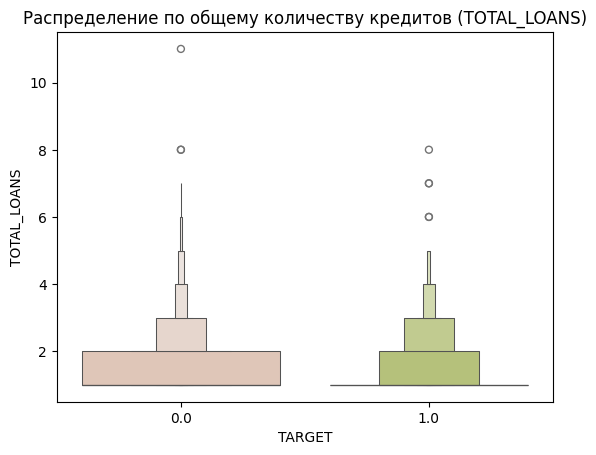

In [ ]:
sns.boxenplot(x='TARGET', y='TOTAL_LOANS', data=df, palette=colors)
plt.title('Распределение по общему количеству кредитов (TOTAL_LOANS)')
plt.show()

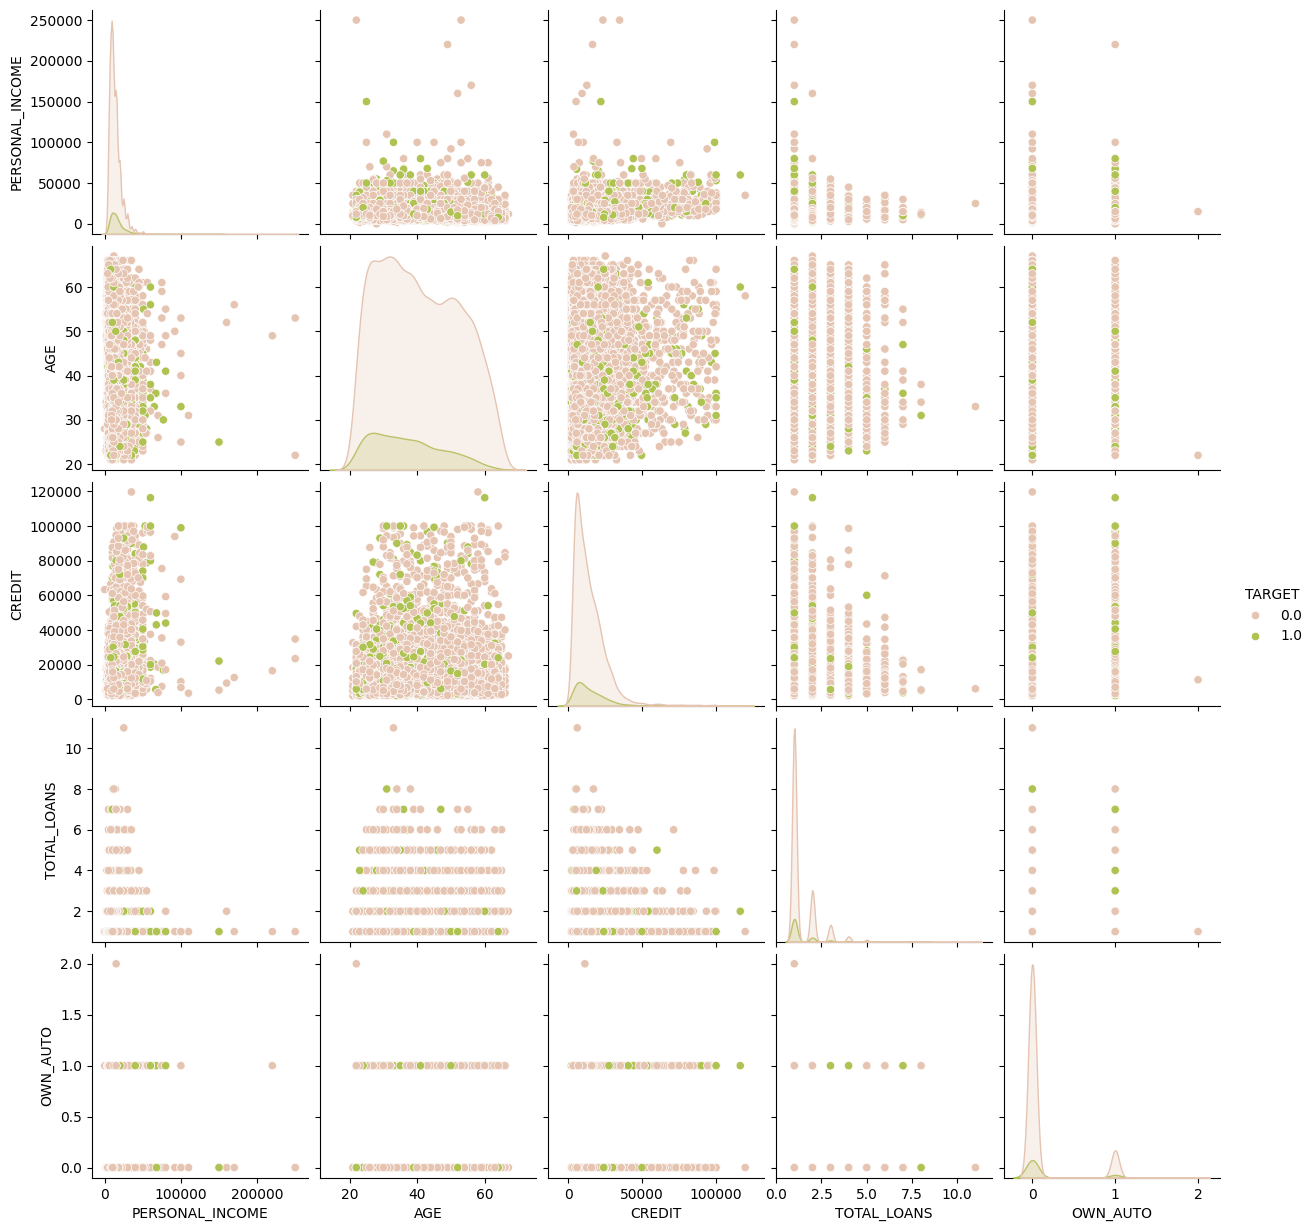

In [ ]:
sns.pairplot(df[['PERSONAL_INCOME', 'AGE', 'CREDIT', 'TOTAL_LOANS', 'OWN_AUTO', 'TARGET']], hue='TARGET')
plt.show()

In [ ]:
!pip install phik

interval columns not set, guessing: ['GENDER', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'FL_PRESENCE_FL', 'AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'CREDIT', 'TERM', 'FST_PAYMENT', 'OWN_AUTO', 'PERSONAL_INCOME', 'TOTAL_LOANS', 'CLOSED_LOANS', 'WORK_YEARS', 'TARGET']


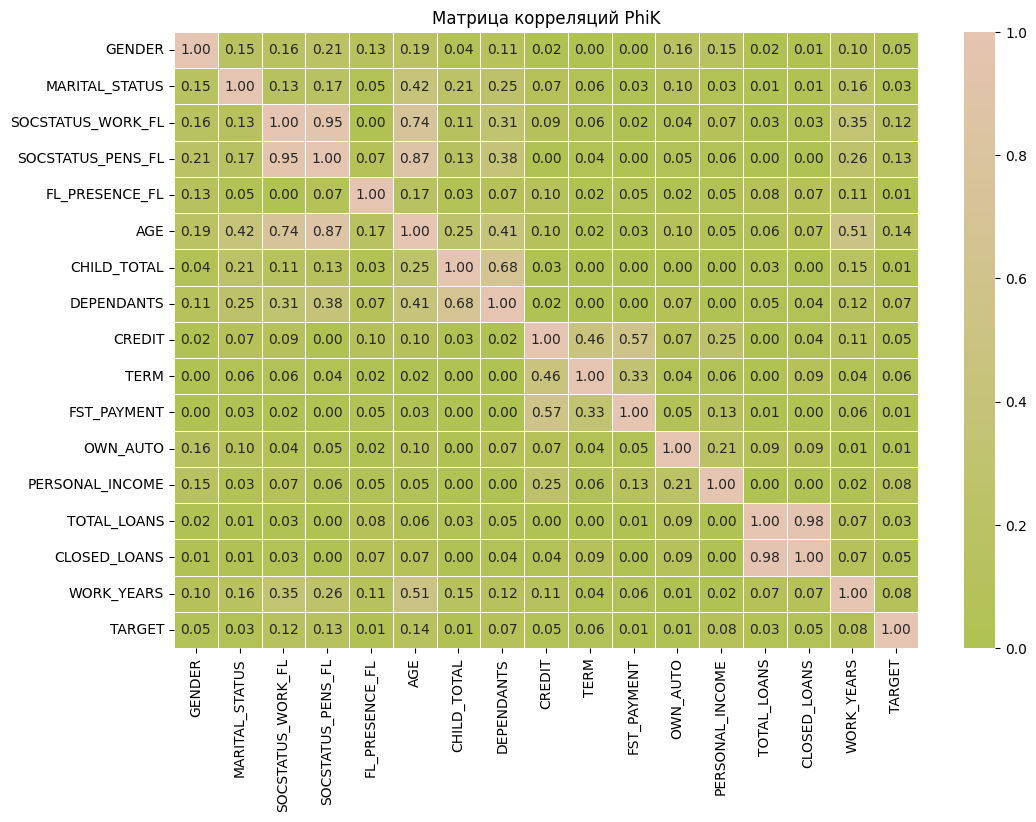

In [ ]:
import phik
from phik import phik_matrix

# Вычисляем корреляцию PhiK
phik_corr = df[categorical + numerical + ['TARGET']].phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_corr, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций PhiK')
plt.show()

### 3. Modelling time

In [ ]:
# - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
# - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
# - AGE — возраст клиента;
# - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
# - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
# - GENDER — пол клиента (1 — мужчина, 0 — женщина);
# - CHILD_TOTAL — количество детей клиента;
# - DEPENDANTS — количество иждивенцев клиента;
# - PERSONAL_INCOME — личный доход клиента (в рублях);
# - LOAN_NUM_TOTAL — количество ссуд клиента;
# - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL',
       'DEPENDANTS', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL', 'OWN_AUTO', 'GEN_INDUSTRY',
       'GEN_TITLE', 'JOB_DIR', 'CREDIT', 'TERM', 'FST_PAYMENT',
       'FAMILY_INCOME', 'PERSONAL_INCOME', 'AGREEMENT_RK', 'TARGET',
       'TOTAL_LOANS', 'CLOSED_LOANS', 'WORK_YEARS'],
      dtype='object')

In [ ]:
categorical = ['GENDER', 'MARITAL_STATUS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL',
       'FL_PRESENCE_FL']

In [ ]:
numerical = ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'CREDIT',
             'TERM', 'FST_PAYMENT', 'OWN_AUTO',
             'PERSONAL_INCOME', 'TOTAL_LOANS', 'CLOSED_LOANS', 'WORK_YEARS']

In [ ]:
X = categorical + numerical

In [ ]:
y = ['TARGET']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[X], df[y], test_size=0.2, random_state=42, stratify=df[y])

In [ ]:
X_train

,GENDER,MARITAL_STATUS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,AGE,CHILD_TOTAL,DEPENDANTS,CREDIT,TERM,FST_PAYMENT,OWN_AUTO,PERSONAL_INCOME,TOTAL_LOANS,CLOSED_LOANS,WORK_YEARS
6052,1,Не состоял в браке,1,0,0,23,0,0,3617.0,3.0,2000.0,0,5500.0,1,1.0,0.0
19819,0,Состою в браке,0,1,0,46,0,0,15100.0,10.0,3000.0,0,9000.0,1,0.0,0.0
8860,0,Не состоял в браке,1,0,1,33,0,0,8500.0,6.0,5000.0,0,10000.0,3,3.0,6.0
3105,0,Состою в браке,1,0,0,27,1,1,31015.0,12.0,5000.0,0,9000.0,2,1.0,8.0
990,1,Разведен(а),1,1,1,60,0,0,18200.0,7.0,3000.0,0,19000.0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,1,Состою в браке,1,0,0,42,1,1,9900.0,9.0,5000.0,0,8000.0,1,0.0,22.0
19940,1,Состою в браке,1,0,1,54,3,0,8320.0,4.0,0.0,0,8000.0,2,1.0,3.0
3389,1,Состою в браке,0,1,0,55,0,0,22770.0,10.0,2530.0,0,6000.0,1,0.0,0.0
14501,0,Состою в браке,1,0,0,47,3,0,8450.0,6.0,1000.0,0,15000.0,1,1.0,0.0


У нас стоит задача максимально точно находить 1 и минимизировать ошибки пропуска (False Negative), даже если это приведёт к ошибкам избыточных предложений (False Positive), поэтому для метрики будем использовать recall

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RidgeClassifier(alpha=1.0, class_weight="balanced"))
])

In [ ]:
from scipy.special import expit  # Для применения сигмоидной функции

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_val)

y_pred_ridge_scores = ridge_model.decision_function(X_val)

# Преобразование их в вероятности с помощью сигмоидной функции
y_pred_ridge_proba = expit(y_pred_ridge_scores)

print("\nRidgeClassifier:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_ridge):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_ridge):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_pred_ridge_proba):.4f}")


RidgeClassifier:
Accuracy: 0.5672
Recall: 0.6133
AUC: 0.6393


Результат AUC у нас на вероятностях, на метках класса будет хуже, так что поподбираем threshold

Мы хотим максимально точно предсказывать 1 (Recall высокий), но при этом не заваливать всех подряд (Accuracy не слишком низкая). Буду использовать F2 меру

In [ ]:
from sklearn.metrics import fbeta_score

thresholds = np.arange(0.1, 1.0, 0.02)
best_threshold = 0
best_f2 = 0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_ridge_proba >= threshold).astype(int)

    f2 = fbeta_score(y_val, y_pred_thresholded, beta=2)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.2f} with F2: {best_f2:.4f}")



Best threshold: 0.46 with F2: 0.4374


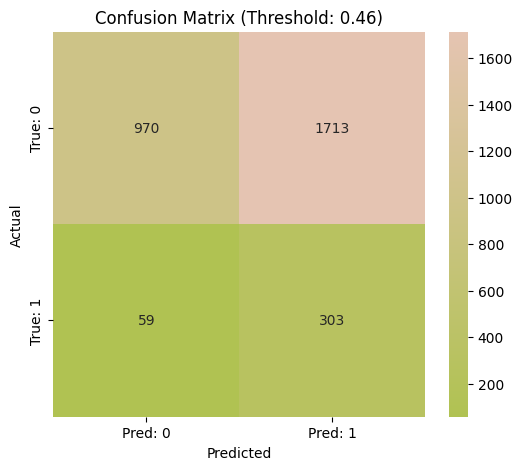

True Positives: 970
False Negatives: 1713
False Positives: 59
True Negatives: 303


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Применяем лучший порог к вероятностям
y_pred_best_threshold = (y_pred_ridge_proba >= best_threshold).astype(int)

# Строим confusion matrix
cm = confusion_matrix(y_val, y_pred_best_threshold)

# Визуализируем confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title(f'Confusion Matrix (Threshold: {best_threshold:.2f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Также выводим основные метрики из матрицы ошибок
TP, FN, FP, TN = cm.ravel()
print(f"True Positives: {TP}")
print(f"False Negatives: {FN}")
print(f"False Positives: {FP}")
print(f"True Negatives: {TN}")


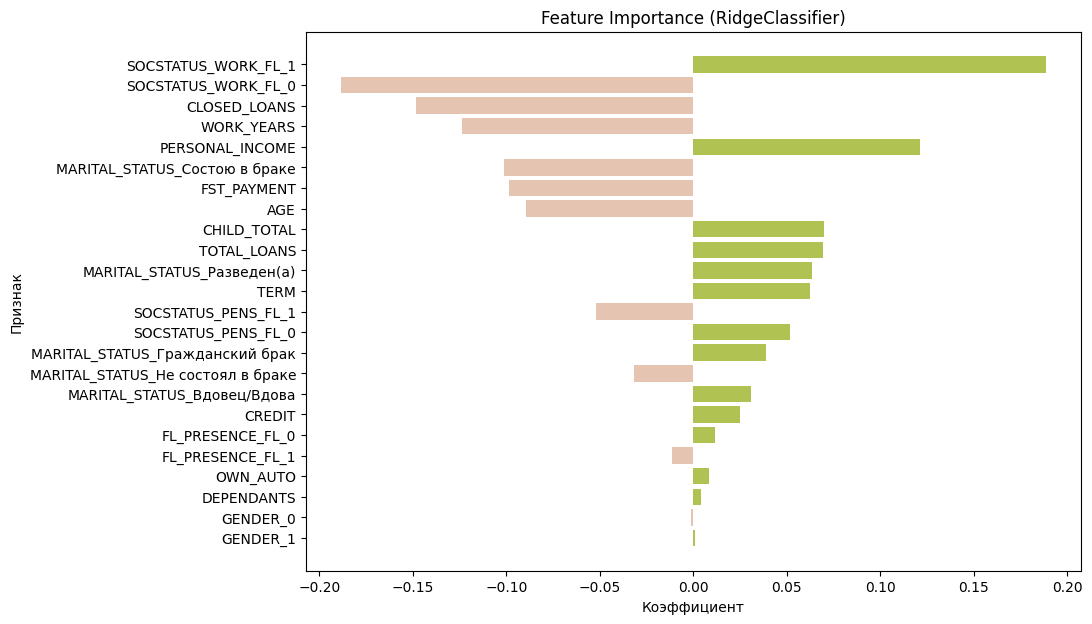

In [ ]:
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(numerical)) + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical))

coefs = ridge_model.named_steps['classifier'].coef_.flatten()

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 7))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=[colors[0] if x < 0 else colors[1] for x in coef_df['Coefficient']])
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.title('Feature Importance (RidgeClassifier)')
plt.gca().invert_yaxis()  # Переворачиваем ось, чтобы важные фичи были вверху
plt.show()

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.